In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## EDA

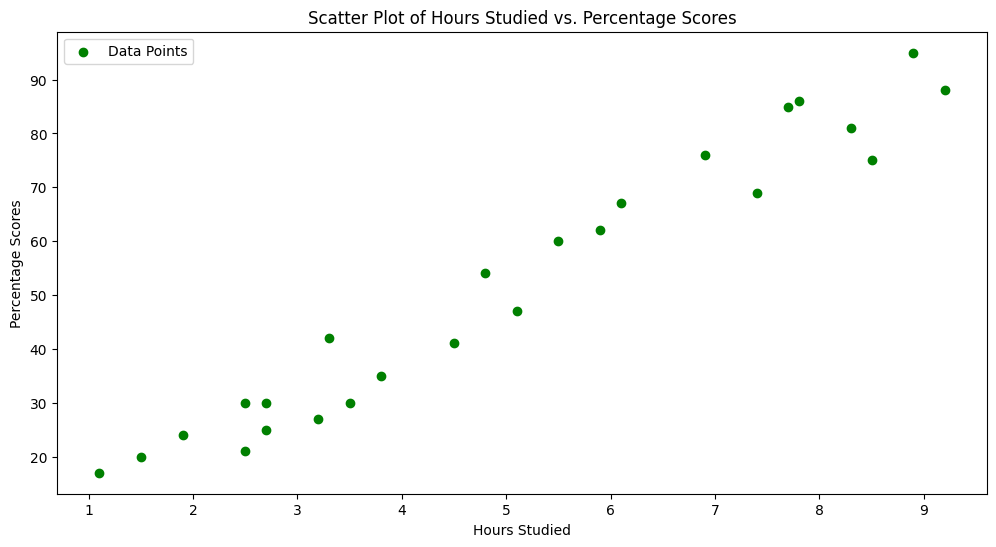

In [6]:
plt.figure(figsize=(12,6))
plt.scatter(df['Hours'],df['Scores'],c='green',marker='o',label='Data Points')
plt.title('Scatter Plot of Hours Studied vs. Percentage Scores')
plt.xlabel("Hours Studied")
plt.ylabel('Percentage Scores')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


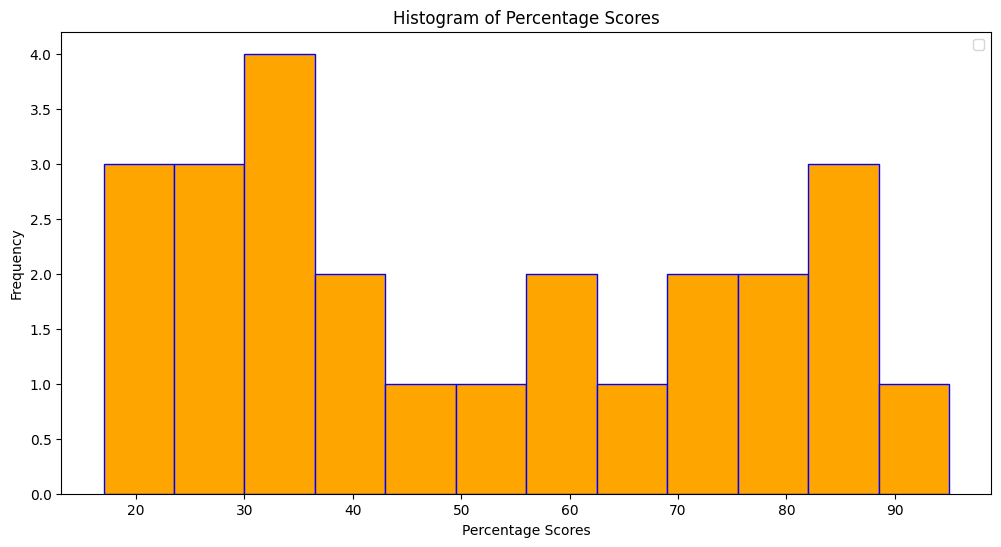

In [7]:
plt.figure(figsize=(12,6))
plt.hist(df['Scores'],bins=12,color='orange',edgecolor='blue')
plt.title("Histogram of Percentage Scores")
plt.xlabel("Percentage Scores")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Text(0.5, 0, 'Percentage Scores')

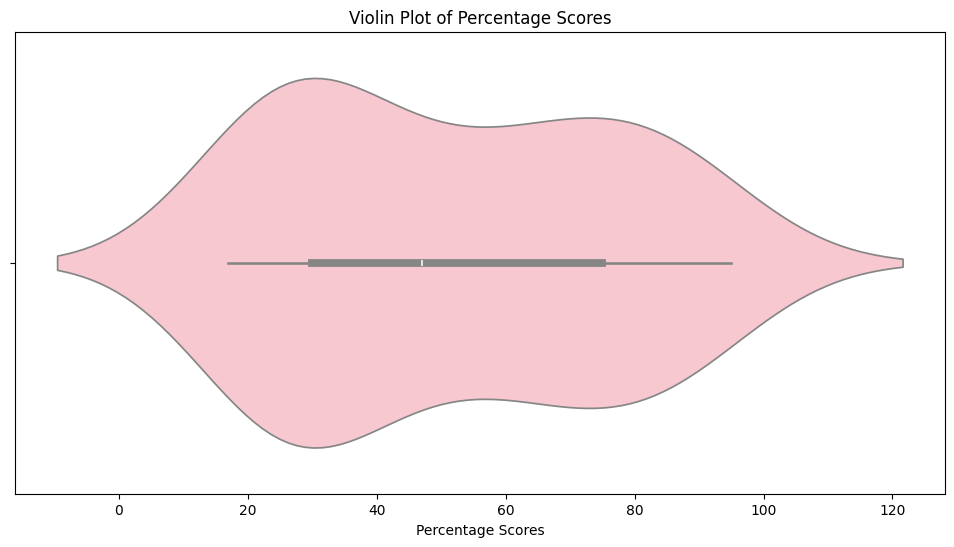

In [9]:
# create a violin plot of Percentage Scores
plt.figure(figsize=(12,6))
sns.violinplot(x='Scores' ,data=df,color='pink')
plt.title("Violin Plot of Percentage Scores")
plt.xlabel('Percentage Scores')

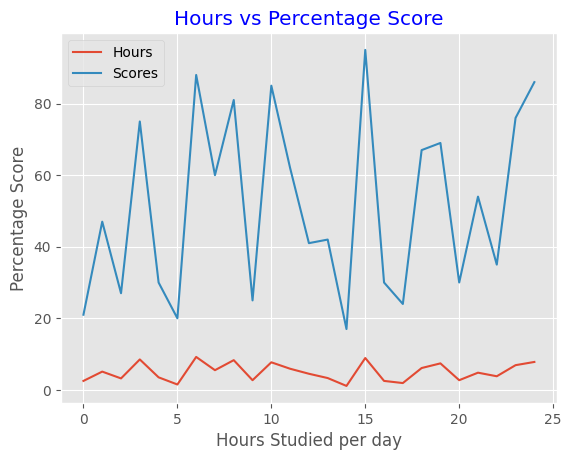

In [10]:
plt.style.use('ggplot')
df.plot(kind='line')
plt.title("Hours vs Percentage Score", color='blue')
plt.xlabel('Hours Studied per day')
plt.ylabel('Percentage Score')
plt.show()

In [11]:
X = df.iloc[:, :-1].values #Independent variable(Hours)
y = df.iloc[:, 1].values #Dependent variable(Scores)

In [12]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
# Model training
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


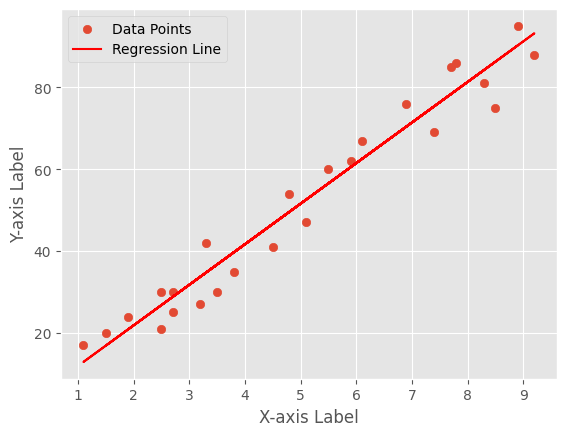

In [15]:
# Scatter plot for the data points
plt.scatter(X, y, label='Data Points')

# Plotting the regression line using the model's predictions
plt.plot(X, regressor.predict(X), color='red', label='Regression Line')

# Labels and legend
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.legend()

# Display the plot
plt.show()

## PREDICTIONS

In [16]:
y_pred = regressor.predict(x_test)

In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [23]:
#Manual test. test with your own data

hours = 10
predicted = regressor.predict([[hours]])
print("Number of hours =", hours)
print("Predicted score is =", predicted[0])

Number of hours = 10
Predicted score is = 101.12472484785702


In [24]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R-Squared',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
RMSE: 4.647447612100367
R-Squared 0.9454906892105355


In [25]:
import pickle
pickle.dump(regressor, open('model.pkl', 'wb'))

In [30]:
models=pickle.load(open('model.pkl', 'rb'))
print(models)

LinearRegression()


In [29]:
hours=9
models.predict([[hours]])

array([91.21406837])